<h1><center>Laboratorio 2: OOP con Imágenes 📷</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2025</strong></center>

### Cuerpo Docente:

- Profesores: Diego Cortez, Gabriel Iturra
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Nicolás Cabello, Cristopher Urbina

### Equipo: **SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: Paula Bastías 
- Nombre de alumno 2: Thomas Aguilera


### **Link de repositorio de GitHub:** [Repositorio](https://github.com/...../)

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda **fuertemente** asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Temas a tratar:

- Programación Orientada a Objetos.
- Programación Funcional.
- `Numpy` para manejo de datos en arreglos/tensores.




### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado **sin el uso indiscriminado de iteradores nativos de python (aka "for", "while")**. La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos.

El lab estará basado en algunos conceptos básicos de procesamiento de imágenes, por lo que te iremos guiando, paso a paso por cada uno de los tópicos a desarrollar.

## Descripción del laboratorio.

En Data Science son múltiples las aplicaciones que exigen el uso exhaustivo de listas de varias dimensiones. Estas entidad reciben formalmente el nombre de **arreglos o tensores**.

Pensemos en que queremos almacenar objetos en un casillero común y corriente: podemos pensar que este puede ser representado por una matriz de dos dimensiones: alto y ancho. ¿Que sucederá si este casillero nos queda pequeño y queremos guardar más información del mismo tipo?: La solución es simple es agregar otro casillero. Esto puede ser pensado como el aumento de la dimensión de nuestro objeto, pasando a ser ahora (alto, ancho, id casillero). Esto no es otra cosa que un **tensor de 3 dimensiones**.

<br>
<center>
<img src="https://i.imgur.com/HRiF5qA.png" width=600 height=600 />
</center>
<br>

### ¿Bueno y que tiene que ver todo esto con las imágenes?

Una imagen es una representación visual de una matriz que contiene de números que describen intensidades de color (llamados píxeles). Esto visto desde la perspectiva de una imagen en blanco y negro, vendria siendo una matriz que reune las diferentes intensidades de los pixeles desde 0 a 255.

<br>
<center>
<img src="https://miro.medium.com/max/1386/1*bV7S0zACdidh11ikjYpLpQ.png" width=500 height=500 alt="Representación de una imagen" />
</center>
<br>

Cuando las imágenes poseen colores, las imágenes vendrían siendo "sin querer queriendo", una bella representación de lo que es un tensor: estas pueden ser representadas por un tensor de 3 dimensiones que les dan el *ancho, alto y el canal*, en donde son alojados los colores de la imagen.

<br>
<center>
<img src="https://miro.medium.com/max/2146/1*icINeO4H7UKe3NlU1fXqlA.jpeg" width=300 height=300 alt="Representación de una imagen" />
</center>
<br>

Como pueden ver, la imagen puede ser interpretada como un tensor de tres dimensiones(un ancho, un alto y la intensidad de cada color) en el a cada posición $(i,j)$ de la imagen, le asociaremos 3 intensidades de colores RGB (Rojo, Verde y Azul). Estas intensidades irán desde el $0$ al $255$. La combinación de estos 3 canales nos permitirá representar gran parte de los colores que encontramos en la naturaleza.

**Instalar paquetes: Si están usando conda**


In [ ]:
import sys

!conda install --yes --prefix {sys.prefix} pillow plotly imageio

/bin/bash: conda: command not found


**Instalar paquetes: Si están usando pip**


In [1]:
import sys

!{sys.executable} -m pip install pillow plotly imageio


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


**En caso de trabajar con colab:**

In [ ]:
try:
    from google.colab import drive

    drive.mount("/content/drive")
    path = ""
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [6]:
# En este lab usaremos adicionalmente pillow, una estupenda librería
# para manejar imágenes.
# https://pillow.readthedocs.io/en/stable/

from PIL import Image
import numpy as np
import plotly.express as px

foto = np.array(Image.open("./images_lab/cobija.PNG").convert("RGB")) # Red Green Blue

# Solo para ejemplificar, usaremos plotly (NO USARLO EN LO QUE QUEDA DEL LAB).
# Pero en el restro del laboratorio, matplotlib debe ser usado

fig = px.imshow(foto)
fig.show()

Luego, llamando la variable donde alojamos el array podemos ver los valores que componen a esta imagen.

In [3]:
print(f'Número de dimensiones: {foto.ndim}')
print(f'Número de elementos por dimensión: {foto.shape}')

Número de dimensiones: 3
Número de elementos por dimensión: (470, 597, 3)


Finalmente visualizamos de forma aleatoria los pixeles de cada canal para mostrar sus intensidades.

In [7]:
print(f"Ejemplo de pixel (10, 200) en el canal 0 - Red: {foto[10, 200, 0]}")
print(f"Ejemplo de pixel (10, 200) en el canal 1- Green: {foto[10, 200, 1]}")
print(f"Ejemplo de pixel (10, 200) en el canal 2- Blue: {foto[10, 200, 2]}")

Ejemplo de pixel (10, 200) en el canal 0 - Red: 97
Ejemplo de pixel (10, 200) en el canal 1- Green: 70
Ejemplo de pixel (10, 200) en el canal 2- Blue: 48


Con lo anterior, suponiendo que la imagen del "gatito" tiene una altura igual a 600 y un ancho de 400, el tensor $G$ que representa a la imagen vendrá dado por $G[600, 400, 3]$.

### Videos

Luego, si queremos complejizar aún mas esto y queremos tener tensores que agrupen un conjunto de imágenes (de igual tamaño) tendremos lo siguiente:


<br>
<center>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRk4BWrH_xi_blsx9Y32OTT8k80vI90udG-Yg&usqp=CAU" width=300 height=300 alt="Representación de una imagen" />
</center>
<br>

Este conjunto de imágenes nos generará la necesidad de producir una nueva dimensión, esto producto que las dimensiones son los espacios donde alojamos la información, por esto al conjunto de imágenes le agregaremos una dimensión que identifica cada una de las imágenes del conjunto, quedando representada por el tensor $G[0:n_d, 600, 400, 3]$. Por lo general, cuando tenemos imágenes con dimensionalidad 4 es porque se tratan de videos, o sea una secuencia de imágenes; el caso se complejiza aún más cuando agregamos sonido y esto se va a las pailas.

<blockquote>Dato:
La representación que posee cada una de las dimensiones puede cambiar dependiendo de la librería utilizada, en pytorch por ejemplo las dimensiones de una imagen vienen dadas por [batch, canales, alto, ancho] y no [batch, alto, ancho, canales] como en numpy.
</blockquote>


### ¿Ya, pero esto tiene aplicaciones más allá de guardar información en casilleros?

Para el caso de imágenes podemos encontrar múltiples aplicaciones con la manipulación de los tensores y operando matemáticamente con ellos. Algunas de las aplicaciones más conocidas (y que aplicaremos) son las siguientes:

- **Obtener el negativo de una imagen**: Consiste en obtener el color complementario de una imagen, para esto debemos restar la imagen con la máxima intensidad que podemos encontrar en una imagen (o sea 255).
    
    
- **Pasar a escala de grises una imagen**: Los valores RGB se convierten a escala de grises mediante la fórmula NTSC:

    $$ imagen\_gris = 0.299 * Rojo + 0.587 * Verde + 0.114 * Azul $$
    
    Esta fórmula representa la percepción relativa de la persona promedio del brillo de la luz roja, verde y azul.
    
    
- **Mejora de contraste**: Son múltiples las técnicas que nos permiten mejorar el contraste de una imagen, pero, una técnica simple para modificar los contrastes consta en obtener un factor de corrección llamado F en base al contraste deseado (C). Luego, es aplicado en la diferencia entre la imagen y 128. De esta forma obtenemos R, que es la imagen con la mejora de contraste deseada.

    $$ F=259*(C+255)/(255*(259-C)) $$
    $$ R=F*(img-128)+128 $$
  
  
- **Convolución**: Consiste en recorrer una imagen por cada uno de sus canales utilizando una matriz que lleva por nombre Kernel. El kernel, examinará los conjuntos de pixeles que recorre, aplicando una multiplicación de los valores circundantes ,y sumando todos los valores generados de este producto para generar un nuevo pixel en el tensor de salida.

![conv](https://media3.giphy.com/media/i4NjAwytgIRDW/giphy.gif "miracomorecorre")

---

# Desarrollo

En base a lo explicado y visto en clases, a continuación, deben construir cada uno de los programas solicitados en las actividades señaladas más abajo. Estás, deben ser desarrollados de forma grupal (**2 personas por grupo**) y, la solución no debe ser compartida con personas externas al grupo; si se detecta que dos grupos entregan el mismo trabajo, será considerado plagio y se tomaran medidas al respecto.

## 2. Creación de Clases y Funciones.

#### Importamos librerias utiles 😸

In [8]:
# Libreria Core del lab.
import numpy as np
from pathlib import Path

# Librerias para graficar
import matplotlib.pyplot as plt

# Nota: Utilizar solo matplot para este lab. NO USAR PLOTLY,
# ya que tiene problemas de compatibilidad con imagenes

# Funcionalidades dependientes del Sistema Operativo.
import os

# Librerias utiles para cargar y generar Gifs
import imageio
from PIL import Image
from scipy.signal import convolve2d

### 2.1. Carga de imagenes y visualización

Descomprima el archivo "images_lab.zip" en algún directorio de su computador o plataforma, observen las imágenes y clasifíquenlas a su gusto, para luego en un diccionario cargar y agrupar las diferentes imágenes (no cree mas de tres llaves).

Hecho esto, visualize dos imágenes y verifique la dimensionalidad de estas imágenes con el comando *.shape*. Comente la dimensionalidad de las imágenes.

### Carga de imagenes en diccionarios

Las siguientes celdas de código le permitirá cargar las imágenes que utilizaremos durante este laboratorio.

La primera celda implementa la función `from_jpg`, la cual, dado una ruta, carga una imágen:


In [9]:
def from_jpg(path):
    ruta = Path(path) # Esto se cambia -> ruta de la carpeta google drive
    image = np.array(Image.open(ruta), dtype='int')
    return image

La segunda celda carga las imágenes y las guarda en un diccionario.

In [10]:
images = {
    "gatitos": [
        from_jpg("./images_lab/gato1.jpg"),
        from_jpg("./images_lab/gato2.jpg"),
        from_jpg("./images_lab/gato4.jpg"),
    ],
    "Personas": [
        from_jpg("./images_lab/personas.jpg"),
        from_jpg("./images_lab/gurus.jpg"),
    ],
    "Monos_chinos": [from_jpg("./images_lab/monitos.jpg")],
}

In [12]:
a = from_jpg("./images_lab/gato1.jpg")
a

array([[[151, 147, 146],
        [171, 167, 166],
        [184, 180, 179],
        ...,
        [143, 132, 128],
        [134, 123, 119],
        [131, 120, 116]],

       [[156, 152, 151],
        [175, 171, 170],
        [187, 183, 182],
        ...,
        [146, 135, 131],
        [138, 127, 123],
        [134, 123, 119]],

       [[149, 145, 144],
        [169, 165, 164],
        [186, 182, 181],
        ...,
        [151, 140, 136],
        [145, 134, 130],
        [142, 131, 127]],

       ...,

       [[126, 124, 111],
        [119, 117, 104],
        [115, 113, 100],
        ...,
        [104, 103,  98],
        [107, 106, 101],
        [118, 117, 112]],

       [[129, 127, 114],
        [124, 122, 109],
        [121, 119, 106],
        ...,
        [107, 106, 101],
        [110, 109, 104],
        [119, 118, 113]],

       [[131, 129, 116],
        [127, 125, 112],
        [125, 123, 110],
        ...,
        [105, 104,  99],
        [108, 107, 102],
        [117, 116, 111]]

### Plot de imagenes
A continuación, utilice la función `def show(imagen)` (definida más abajo) para explorar las imágenes cargadas en la celda anterior.

**Respuesta Esperada**:

In [15]:
def show(imagen):
    plt.imshow(imagen)
    plt.show()
    x, y, z = imagen.shape
    print(f'Dimensiones de la imagen: {x}x{y}x{z} (Alto x Ancho)')

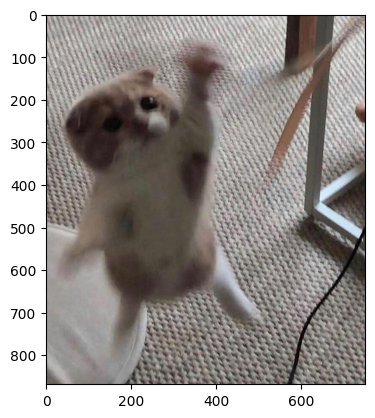

Dimensiones de la imagen: 869x750x3 (Alto x Ancho)


In [16]:
show(images['gatitos'][0])
# usar show para mostrar las otras imágenes...

### 2.2 Clase imagenes [2 puntos].

Ahora que sabemos cómo plotear y cargar una imagen, cree una clase llamada "Imagen" la que cumpla las siguientes características:

- [X] Un constructor que tome como argumento una imagen y que lo guarde como un atributo. `__init__` debe comprobar que la imagen es un arreglo de numpy (con `isinstance`) y adicionalmente que este tiene 3 dimensiones. En caso contrario, debe levantar excepciones con mensajes correspondientes al error detectado (ustedes definen el mensaje).
- [ ] Implemente el método `show()` que muestre la imagen usando la función `plt.show()`.
- [ ] Implemente el método `info()` que retorna un string con las dimensiones de la imagen.
- [ ] Sobrecargue el método mágico `__mul__`, `__add__` y `__sub__` para realizar operaciones matemáticas entre el objeto y arrays, int o floats. Realice la función pensando que la operación se puede aplicar tanto para izquierda y derecha. Como estamos trabajando con imágenes los outputs deben ser enteros, por esto se le aconseja utilizar `.astype(int)` para transformar los arrays de salida a un formato legible por matplotlib.
- [ ] Es importante que para las operaciones `__add__` y `__sub__` implementen una saturación de las imágenes. Es decir, la suma o resta deben dar como valor máximo 255 y/o como valor mínimos mayores o iguales a 0.
- [ ] Para el caso de `__mul__` deben implementar un método que nos permita saturar las imágenes (es decir que los valores del array no sobrepasen 255) y también no nos permita obtener valores inferiores a cero.

Implementadas los métodos, compruebe que la funcionalidad es la correcta mediante la ejecución de los asserts incluidos un par de celdas más abajo.

> **Notas:**
- Pueden reutilizar el código implementado en las celdas anteriores para implementar los métodos `show` e `info` . Sin embargo, No invoquen directamente esas funciones.
- La idea es que la imagen contenida en la clase sea inmutable, por ende, todos los metodos que modifiquen la imagen contenida en el objeto deberan retornar un nuevo objeto de la clase `Imagen` que contenga la imagen modificada.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Imagen:
    """Clase contenedora de imágenes"""

    def __init__(self, img):
        if isinstance(img, np.ndarray):
            if img.ndim != 3:
                raise ValueError("El argumento debe ser un arreglo de numpy de solo 3 dimensiones")
            if img.shape[-1] != 3:
                raise ValueError(
                    "El argumento debe ser un arreglo de numpy de solo 3 dimensiones "
                    "tal que la última dimensión solo tiene 3 canales (RGB)"
                )
            self.imagen = img
        else:
            raise TypeError(
                "Debes entregar un arreglo de numpy como argumento del constructor de "
                "Imagen"
            )

    def show(self):
        """Muestra la imagen contenida en el objeto."""
        plt.imshow(self.imagen)
        plt.axis('on') 
        plt.show()

    def info(self):
        """ Retorna un string con las dimensiones de la imagen (Alto y Ancho)."""
        height, width, _ = self.imagen.shape
        return f"Dimensiones de la imagen: Alto={height}px, Ancho={width}px"

    def __add__(self, other):
        """Redefine la operación + entre imagen y escalar/arreglo.
        Satura los valores entre 0 y 255.
        """
        #realiza la suma
        new_image_data = self.imagen + other

        #satura los valores: mínimo 0, máximo 255
        new_image_data = np.clip(new_image_data, 0, 255).astype(int)

        #retorna un nuevo objeto Imagen
        return Imagen(new_image_data)

    def __radd__(self, other):
        """Operación conmutativa de __add__."""
        return self.__add__(other)

    def __sub__(self, other):
        """Redefine la operación - entre imagen y escalar/arreglo.
        Satura los valores entre 0 y 255.
        """
        #realiza la resta
        new_image_data = self.imagen - other

        # Satura los valores: mínimo 0, máximo 255
        new_image_data = np.clip(new_image_data, 0, 255).astype(int)

        #retorna un nuevo objeto Imagen
        return Imagen(new_image_data)

    def __rsub__(self, other):
        """Operación conmutativa de __sub__.
        Nota: la resta no es estrictamente conmutativa (a - b != b - a),
        así que aquí other - self.imagen.
        """
        new_image_data = other - self.imagen

        #valores: mínimo 0, máximo 255
        new_image_data = np.clip(new_image_data, 0, 255).astype(int)

        #retorna un nuevo objeto Imagen
        return Imagen(new_image_data)

    def __mul__(self, other):
        """Redefine la operación * entre imagen y escalar/arreglo.
        Satura los valores entre 0 y 255.
        """
        #realiza la multiplicación
        new_image_data = self.imagen * other

        #satura los valores: mínimo 0, máximo 255
        new_image_data = np.clip(new_image_data, 0, 255).astype(int)

        #retorna un nuevo objeto Imagen
        return Imagen(new_image_data)

    def __rmul__(self, other):
        """Operación conmutativa de __mul__."""
        return self.__mul__(other)

**Resultados esperados:**

In [19]:
gatito = Imagen(images["gatitos"][1])
gurus = Imagen(images["Personas"][1])

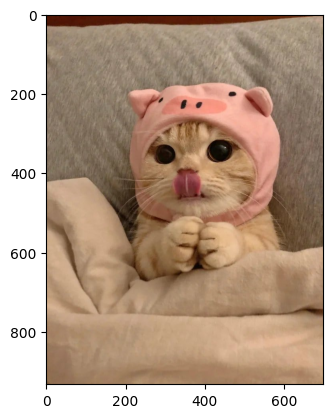

'Dimensiones de la imagen: Alto=933px, Ancho=700px'

In [24]:
# Test show e info.
gatito.show()
gatito.info()



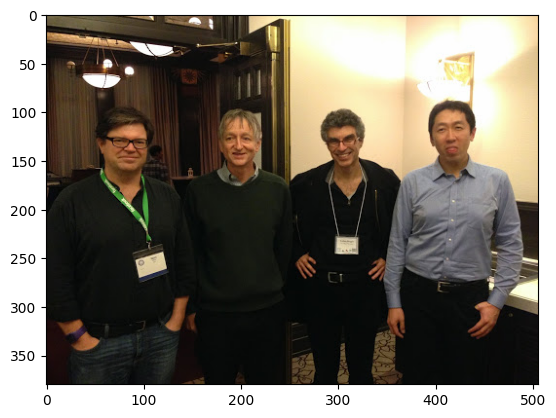

'Dimensiones de la imagen: Alto=380px, Ancho=506px'

In [23]:
gurus.show()
gurus.info()

In [25]:
# Tests de los overload de operadores.

# Test __add__
# Idea del test: Todos los elementos de la imagen deben ser a lo más 255.

# Test __add__
assert np.max((gatito + 1000).imagen) == 255

# Test __radd__
assert np.max((1000 + gatito).imagen) == 255

# Test __sub__
assert np.min((gatito - (-1000)).imagen) == 255

# Test __sub__
assert np.max((gatito - 1000).imagen) == 0

# Test __rsub__
assert np.min((1000 - gatito ).imagen) == 255

# Test __mul__ (probar minimo)
assert np.max((-555555 * gatito).imagen) == 0

# Test __mul__ (probar maximo)
assert np.max((555555*gatito).imagen) == 255

# Test __rmul__ (probar minimo)
assert np.max((gatito*-555555).imagen) == 0

# Test __rmul__ (probar maximo)
assert np.max((gatito*555555).imagen) == 255


### 2.3 Clase de Procesamiento de Imagenes [2 puntos]

Ahora que comprenden las diferentes dimensiones que componen a una imagen (en la práctica), ahora realizaremos diferentes tareas de procesamiento de imágenes. Para esto, deben crear una clase llamada "`LibImagen`" que cumpla los siguientes requisitos:

- [ ] Pasar una imagen a escala de grises, para esto utilice la ecuación (1) expuesta en este mismo notebook.
- [ ] Obtener los canales R, G y B de forma individual.
- [ ] Crear una función que pase a negativo de la imagen alojada.
- [ ] Mejorar el contraste de una imagen.
- [ ] Realizar una convolución sobre la imagen.
- [ ] Documentar la clase creada y verificar la documentación con el comando help().


> **Nota 🗒️**: Todo método debe tomar una Imagen y retornar una nueva Imagen.

> **Nota 2**: El tipo de datos del arreglo de la imagen que generen o modifiquen debe ser "int". De lo contrario, puede no visualizarse correctamente.


In [ ]:
import numpy as np
from scipy.signal import convolve2d

class LibImagen():
    """
    Librería para realizar tareas de procesamiento de imágenes.
    
    Esta clase agrupa métodos estáticos para manipular objetos de tipo 'Imagen'.
    Todas las funciones toman un objeto 'Imagen' como entrada y retornan
    un nuevo objeto 'Imagen' con la transformación aplicada, asegurando
    la inmutabilidad de la imagen original.
    """

    def to_negative(self, img_in):
        """Convierte una imagen a su negativo.

        El negativo se calcula como 255 menos el valor de cada píxel.

        Parameters
        ----------
        img_in : Imagen
            Objeto Imagen que contiene la imagen a procesar.

        Returns
        -------
        Imagen
            Objeto Imagen con la imagen procesada en negativo.
        """
        # Se accede al arreglo numpy dentro del objeto Imagen
        img_array = img_in.imagen
        
        # Se calcula el negativo y se asegura que el tipo sea entero
        negative_array = (255 - img_array).astype(int)
        
        # Se retorna un nuevo objeto Imagen con el resultado
        return Imagen(negative_array)


    def to_gray(self, img_in):
        """
        Transforma una imagen RGB a escala de grises usando la fórmula NTSC.

        La fórmula es: gris = 0.299*R + 0.587*G + 0.114*B.

        Parameters
        ----------
        img_in : Imagen
            Objeto Imagen que contiene una imagen a color.

        Returns
        -------
        Imagen
            Un nuevo objeto Imagen que contiene la imagen en escala de grises.
            Los 3 canales (R, G, B) de la imagen resultante tienen los mismos valores.
        """
        # Se accede al arreglo y se extraen los canales
        rgb_array = img_in.imagen
        r, g, b = rgb_array[:,:,0], rgb_array[:,:,1], rgb_array[:,:,2]
        
        # Se aplica la fórmula NTSC
        gray_values = (0.299 * r + 0.587 * g + 0.114 * b)
        
        # Se crea una nueva imagen de 3 canales apilando los valores de gris
        gray_3d = np.stack([gray_values]*3, axis=2).astype(int)
        
        return Imagen(gray_3d)

    def get_channel(self, img_in, channel):
        """Obtiene un canal de color (R, G o B), seteando los otros en 0.

        Parameters
        ----------
        img_in : Imagen
            Objeto Imagen que contiene una imagen.
        channel : str
            Canal a seleccionar. Valores posibles: 'r', 'g', o 'b'.

        Returns
        -------
        Imagen
            Objeto Imagen que contiene solo el canal de color seleccionado.

        Raises
        ------
        ValueError
            Si el nombre del canal no es 'r', 'g' o 'b'.
        """
        # Se crea una copia para no modificar el original
        img_array = img_in.imagen.copy()
        channel = channel.lower() # Para aceptar 'R', 'G', 'B'

        if channel == 'r':
            img_array[:, :, 1] = 0  # Pone a 0 el canal Verde
            img_array[:, :, 2] = 0  # Pone a 0 el canal Azul
        elif channel == 'g':
            img_array[:, :, 0] = 0  # Pone a 0 el canal Rojo
            img_array[:, :, 2] = 0  # Pone a 0 el canal Azul
        elif channel == 'b':
            img_array[:, :, 0] = 0  # Pone a 0 el canal Rojo
            img_array[:, :, 1] = 0  # Pone a 0 el canal Verde
        else:
            raise ValueError("El canal debe ser 'r', 'g' o 'b'.")
            
        return Imagen(img_array)

    def set_contrast(self, img_in, C):
        """
        Ajusta el contraste de una imagen usando un factor multiplicativo.

        La fórmula utilizada es: NuevoPixel = C * (PixelOriginal - 128) + 128.
        Los valores resultantes son saturados para mantenerse en el rango [0, 255].

        Parameters
        ----------
        img_in : Imagen
            Objeto Imagen que contiene una imagen.
        C : float
            Factor de contraste. C > 1 aumenta el contraste, 0 < C < 1 lo disminuye.

        Returns
        -------
        Imagen
            Objeto Imagen con el contraste ajustado.
        """
        img_array = img_in.imagen.astype(float) # Convertir a float para la operación
        
        # Aplicar la fórmula de contraste
        contrasted_array = C * (img_array - 128) + 128
        
        # Saturar (recortar) los valores para que estén entre 0 y 255
        clipped_array = np.clip(contrasted_array, 0, 255)
        
        return Imagen(clipped_array.astype(int))

    def conv_channel(self, img_in, kernel):
        """
        Aplica una convolución 2D a cada canal de la imagen usando un kernel.

        Este método es útil para aplicar filtros como detección de bordes,
        enfoque (sharpen) o desenfoque (blur) a una imagen.

        Parameters
        ----------
        img_in : Imagen
            Objeto Imagen que contiene la imagen a procesar.
        kernel : np.ndarray
            Matriz (kernel) de 2D que se usará para la convolución.

        Returns
        -------
        Imagen
            Un nuevo objeto Imagen con el filtro de convolución aplicado.
        """
        img = img_in.imagen
        img_out = []
        
        # Itera sobre cada canal (R, G, B) y aplica la convolución
        for i in range(img.shape[-1]):
            img_channel = convolve2d(img[:, :, i],
                                     kernel,
                                     mode="same",      # El output tiene el mismo tamaño que el input
                                     boundary="symm")  # Manejo de bordes por simetría
            img_out.append(img_channel)
            
        # Apila los canales procesados para formar la nueva imagen
        new_image = np.stack(img_out, axis=2)
        
        # Satura los valores para que estén en el rango [0, 255]
        new_image = np.clip(new_image, 0, 255)
        
        return Imagen(new_image.astype(int))

### 2.4 Probar [0,5 puntos]

**Respuesta Esperada**:

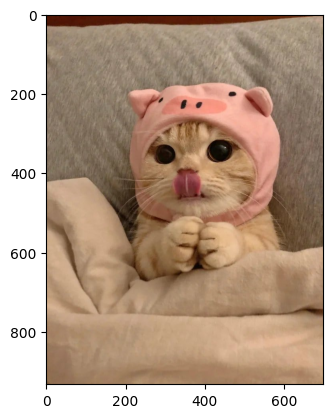

Negativo


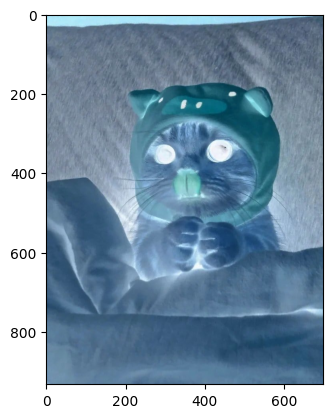

Grayscale


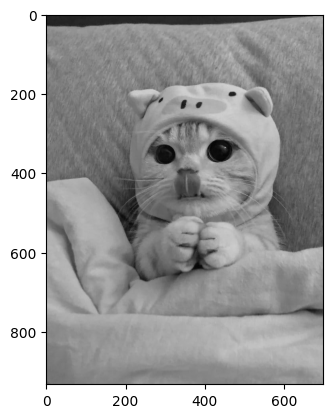

Selección de Canales


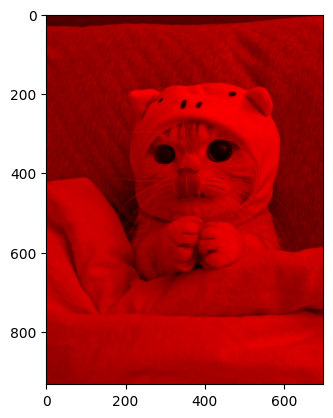

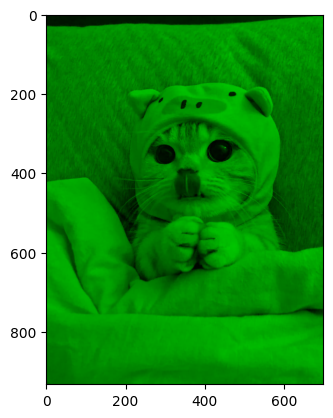

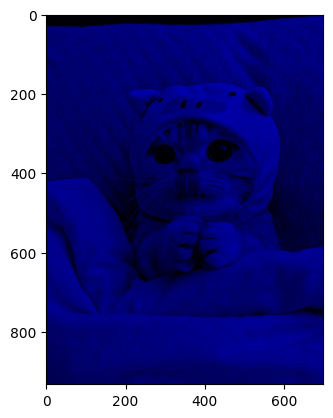

Mejora de Contraste


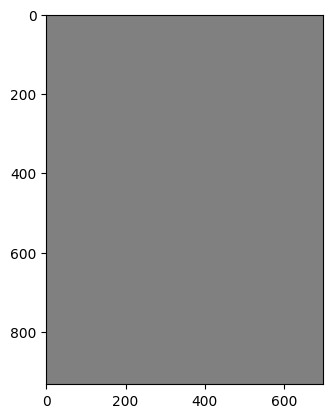

Convolución


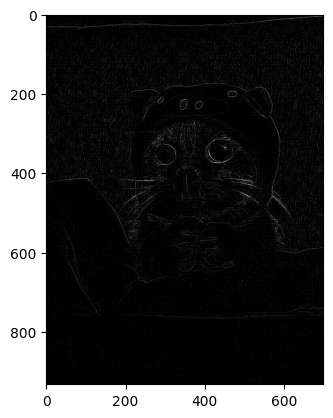

In [27]:
gatito = Imagen(images["gatitos"][1])

gatito.show()

lib = LibImagen()

print('Negativo')
lib.to_negative(gatito).show()

print('Grayscale')
lib.to_gray(gatito).show()

print('Selección de Canales')
lib.get_channel(gatito, "r").show()
lib.get_channel(gatito, "g").show()
lib.get_channel(gatito, "b").show()

print('Mejora de Contraste')
lib.set_contrast(gatito, 0).show()

print('Convolución')
kernel = np.array([[-1, -1,  -1],
                   [-1,  8,  -1],
                   [-1, -1,  -1]])

lib.conv_channel(gatito, kernel).show()

#### Implementar 5 Kernels y probarlos con las imagenes

Referencia:
https://en.wikipedia.org/wiki/Kernel_(image_processing)

In [ ]:
import numpy as np

# 'lib' es una instancia de LibImagen
# y 'gatito' es una instancia de la clase Imagen.
# lib = LibImagen()
# gatito = Imagen( ...) 


kernel_sharpen = np.array([
    [ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0]
])


kernel_blur = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
])


kernel_edge_detection = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

kernel_emboss = np.array([
    [-2, -1, 0],
    [-1,  1, 1],
    [ 0,  1, 2]
])


kernel_identity = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
])

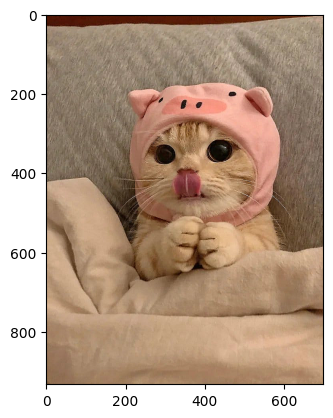

In [30]:
lib.conv_channel(gatito, kernel_sharpen).show()

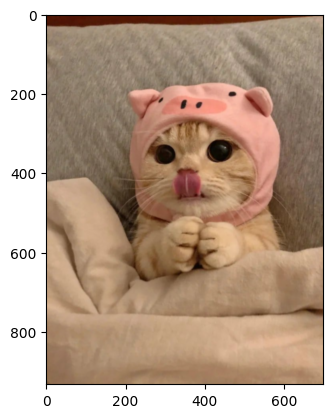

In [31]:
lib.conv_channel(gatito, kernel_blur).show()

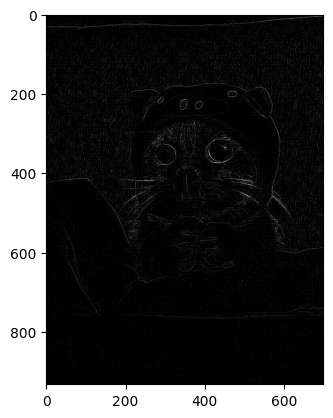

In [32]:
lib.conv_channel(gatito, kernel_edge_detection).show()

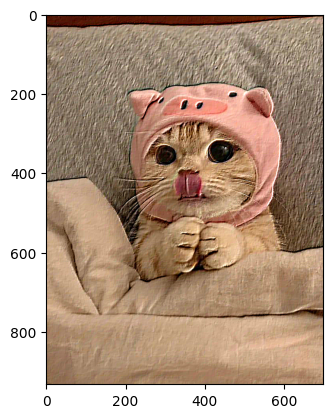

In [33]:
lib.conv_channel(gatito, kernel_emboss).show()

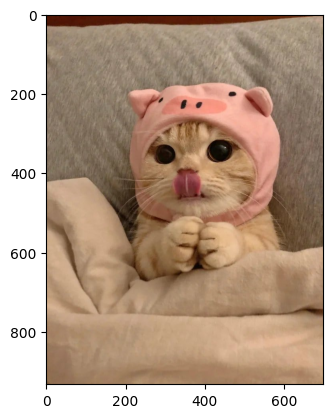

In [34]:
lib.conv_channel(gatito, kernel_identity).show()

**Comente:**

Para finalizar, comente que hace (o debería hacer) cada filtro convolucional al aplicarlas a su imagen de ejemplo.

```
(Escriba aquí su justificación)

El filtro...

1. Kernel de Enfoque (Sharpen) - Acentúa las diferencias entre píxeles, haciendo los bordes más nítidos.
2. Kernel de Desenfoque (Box Blur) - Suaviza la imagen promediando cada píxel con sus vecinos.
3. Kernel de Detección de Bordes (Laplacian) - Resalta las áreas donde hay cambios bruscos de intensidad (bordes).
4. Kernel de Repujado (Emboss) - Crea un efecto de relieve o grabado en la imagen.
5. Kernel de Identidad - No modifica la imagen. Es útil para verificar que la función de convolución funciona.
```



## 3. Secuencias y Detección de Movimiento


### 3.2. Secuencia de Imagenes [1,5 punto]


A continuación, deben programar una función que nos permite resaltar los objetos en movimientos de una secuencia de imágenes. Para esta parte del laboratorio, deberá utilizar las imágenes dispuestas en la carpeta `secuencia_plaza` del archivo zip subido a material docente.

Primero que todo, cargue la secuencia de imágenes que se encuentran en el directorio. Para esto, se recomienda utilizar el comando `os.listdir(dir)`, ya que este le facilitará la carga de un gran número de imágenes (pruebe el comando y vea que sucede).

In [ ]:
path = "./secuencia_plaza/"
img_names = os.listdir(path)

imagenes = np.array(list(map(lambda img: np.array(Image.open(path + img)), img_names)))



![plaza se mueve](https://media0.giphy.com/media/ZAzlopoHETs5lZQ6EZ/giphy.gif "plaza")

Para realizar este ejercicio utilizaremos un método super básico para la eliminación de fondo. Para esto sigue la siguiente receta:
 1. Pase a escala de grises todas las imágenes secuenciales.
 2. Almacene en una variable la resta de las imágenes consecutivas.

   $$ imagen\_out = imagen(t) - imagen(t+1) $$

 3. Establezca un umbral para eliminar algunos artefactos. Pruebe con al menos 3 umbrales.

$$ imagen\_out = imagen\_out> Umbral $$

**Nota**: No es necesario que construya una clase para esta parte.

In [ ]:
def dect_mov(sec_img, umbral=30):
    pass


### 3.3 Resultado

Ahora es tiempo de relajarse y ver si nuestro experimento logra resaltar los objetos en movimiento de esta polémica Plaza, para esto solo ejecute el siguiente Código y espere.

In [ ]:
imageio.mimsave('plaza.gif', dect_mov(imagenes)) # Listo

**Ejemplo de resultado esperado:**

![resultados](https://media3.giphy.com/media/SKV3bgUzHt0MLJTWW2/giphy.gif "res")

### Referencias lab 1.

- http://www.cs.cornell.edu/cv/SummerSchool/Introduction.pdf
- https://en.wikipedia.org/wiki/Tensor
- https://support.ptc.com/help/mathcad/es/index.html#page/PTC_Mathcad_Help/example_grayscale_and_color_in_images.html
- http://w3.unpocodetodo.info/canvas/negativo.php
- http://www.dfstudios.co.uk/articles/programming/image-programming-algorithms/image-processing-algorithms-part-5-contrast-adjustment/